Time to load instance: 0.0045452117919921875
Time to initialize the model: 0.0022935867309570312
Time to build the model: 0.08451724052429199
Time to solve the model: 0.2576632499694824
SolutionSummary(cost=179.99460601493132,
                total_duration=1920.0,
                total_waiting=903.4574270618939,
                avg_waiting=225.86435676547347,
                total_transit=178.07673092680199,
                avg_transit=44.519182731700496)
SolutionSolver(sol_objvalue=179.99460601493135,
               sol_cputime=344,
               graph_numedges=249,
               graph_numnodes=18,
               solver_numconstrs=2496,
               solver_numvars=1172,
               solver_numiterations=551,
               solver_numnodes=1)
{0: 0 D:    74.2221 Q:  1 W:   322.2660 T:    48.0767   0 (w:   0.00; b:   0.00; t:   0.00; q:   0.00)   4 (w: 112.54; b: 120.00; t:   0.00; q:   1.00)  12 (w:   0.60; b: 138.00; t:  15.00; q:   0.00)   2 (w: 168.56; b: 315.92; t:   0.00; q

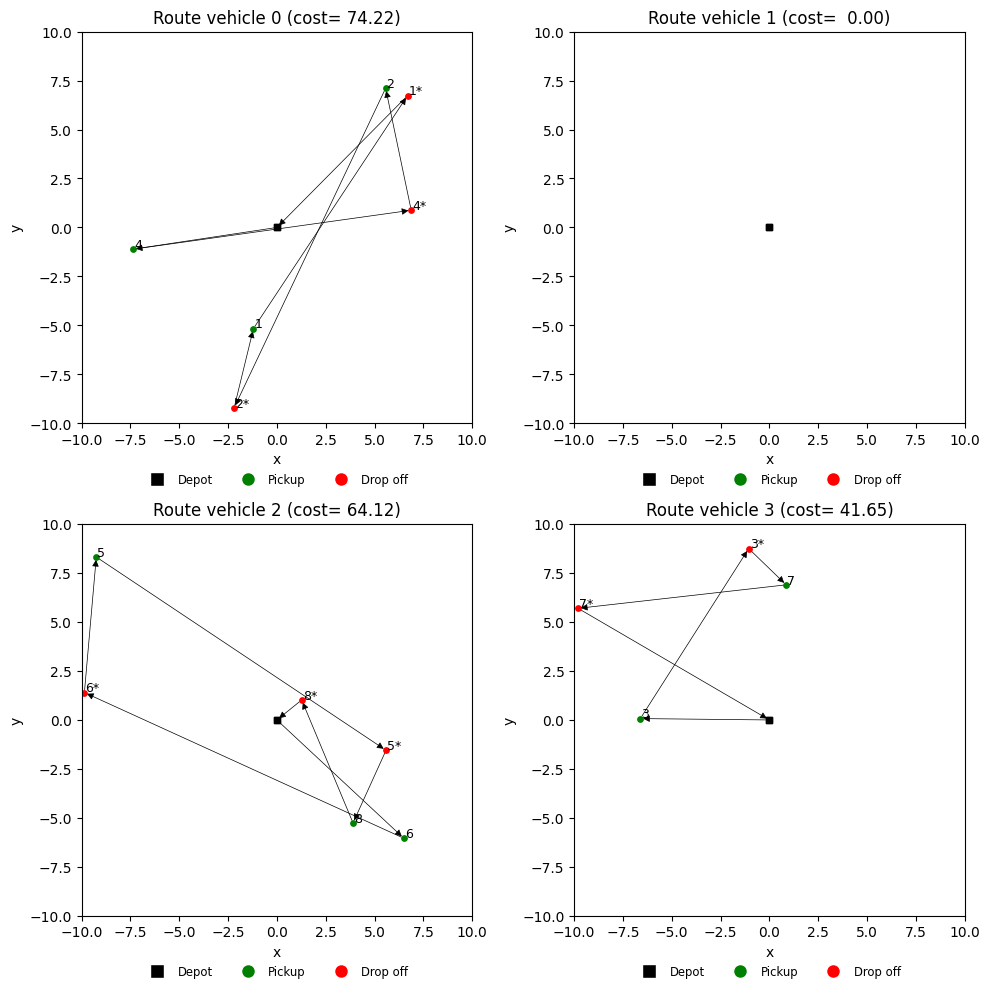

In [47]:
# Add the parent directory list of paths to make it easier to import modules
# outside the notebook folder
import sys
sys.path.append("../")

# IPython automatic [reloading magic](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) to reload all changed modules every time 
# before executing a new line
%load_ext autoreload
%autoreload 2


from time import time
import matplotlib.pyplot as plt
from pprint import pprint

# Functionality is implemented inside package 'src' and imported

# Function in module src.data.parser to parse instance data into an
# and instance object
from src.data.parser import parse_instance_from_filepath

# Module src.solver.darp has a class Darp to build and solve the MILP model
from src.solver.darp import Darp

# Function in module src.visualization.route to plot a vehicle route
from src.visualization.route import plot_vehicle_route


# Instance based on literature (original is a2-16)
# Comprises 4 vehicles and 8 customers
instance_filepath = "../data/raw/darp_instances/darp_cordeau_2006/a4-8"

t_start = time()
instance_obj = parse_instance_from_filepath(instance_filepath)
print("Time to load instance:", time() - t_start)

# Show the instance node data as a Pandas DataFrame
instance_obj.nodeset_df

# Initialize, sets, arcs, distance matrix
t_start = time()
model = Darp(instance_obj)
print("Time to initialize the model:", time() - t_start)

# Set constraints, variables, objective function
t_start = time()
model.build()
print("Time to build the model:", time() - t_start)

# Minimize cost
t_start = time()
solution_obj = model.solve()
print("Time to solve the model:", time() - t_start)

# Show a summary of the solution stats
pprint(solution_obj.summary)

# Show solver specific info
pprint(solution_obj.solver_stats)

# Show vehicle routes as a dictionary (key=vehicle id, value=vehicle route info)
pprint(solution_obj.vehicle_routes)

# Show the routes for each vehicle as a Pandas DataFrame.
# Notice that the the a "dist" function is passed to calculate the distances
# between subsequent nodes. This distance function belongs to the DARP model.
df = solution_obj.route_df(fn_dist=model.dist)
df


# Creating a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

for vehicle_id, vehicle_sol in  solution_obj.vehicle_routes.items():
    
    # Select data for a vehicle
    df_vehicle_solution = df[df["vehicle_id"]==vehicle_id].copy()
    
    # Create a title for this plot
    title_plot = f"Route vehicle {vehicle_id} ({vehicle_sol.summary()})"
    
    # Plot vehicle route in specified grid position (from 0 to 4)
    plot_vehicle_route(axs[vehicle_id], df_vehicle_solution, title=title_plot)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure in the "reports" folder.
# Notice that by doing so, your .tex file that imports this figure will be
# always up to date with the last changes you do.
plt.savefig("../reports/figures/routes_panel.svg")

